## This is the softmax workbook for ECE C147/C247 Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

The goal of this workbook is to give you experience with training a softmax classifier.

In [2]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#Downloading the CIFAR-10 data
import shutil
import urllib.request
urllib.request.urlretrieve(
    "http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz", "utils/datasets/cifar-10-python.tar.gz")

#Unzipping the downloaded file
shutil.unpack_archive(
    "utils/datasets/cifar-10-python.tar.gz", "utils/datasets/")


In [4]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'utils/datasets/cifar-10-batches-py'  # You need to update this line
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)


Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [9]:
from nndl import Softmax

import subprocess

# List of pip commands


In [10]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [11]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [8]:
print(loss)

2.3277607028048966


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this make sense?

## Answer:

Intially, no training is done on the Softmax. Thus, as the weights are initalized to zero, the value of the loss according to the softmax is: -1/m *log((1/10)<sup>m</sup>) = log(10), which is close to 2.3

#### Softmax gradient

In [12]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: -0.659919 analytic: -0.659919, relative error: 4.811308e-08
numerical: -0.887144 analytic: -0.887144, relative error: 1.872054e-08
numerical: 0.593711 analytic: 0.593711, relative error: 1.212518e-08
numerical: 2.179519 analytic: 2.179519, relative error: 3.471660e-10
numerical: -0.557324 analytic: -0.557324, relative error: 1.079517e-07
numerical: 1.998294 analytic: 1.998293, relative error: 1.228015e-08
numerical: -0.522391 analytic: -0.522392, relative error: 1.038401e-07
numerical: -1.286610 analytic: -1.286610, relative error: 2.583998e-09
numerical: 0.518052 analytic: 0.518052, relative error: 9.485669e-09
numerical: -4.808219 analytic: -4.808220, relative error: 1.449431e-08


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [13]:
import time

In [14]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.329781476362285 / 400.2127530552219 computed in 0.07850503921508789s
Vectorized loss / grad: 2.329781476362286 / 400.212753055222 computed in 0.024672985076904297s
difference in loss / grad: -1.3322676295501878e-15 /3.705124159971763e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

iteration 0 / 1500: loss 2.3353835450891545
iteration 100 / 1500: loss 2.0225093946317187
iteration 200 / 1500: loss 1.982172871654982
iteration 300 / 1500: loss 1.9356442081331486
iteration 400 / 1500: loss 1.882893396815689
iteration 500 / 1500: loss 1.81818696973945
iteration 600 / 1500: loss 1.874513153185746
iteration 700 / 1500: loss 1.8361832500173585
iteration 800 / 1500: loss 1.8584086819212184
iteration 900 / 1500: loss 1.9275087067564147
iteration 1000 / 1500: loss 1.824667969507725
iteration 1100 / 1500: loss 1.7731817984393607
iteration 1200 / 1500: loss 1.8636308568113118
iteration 1300 / 1500: loss 1.924074621260815
iteration 1400 / 1500: loss 1.7846918635831293
That took 9.59458303451538s


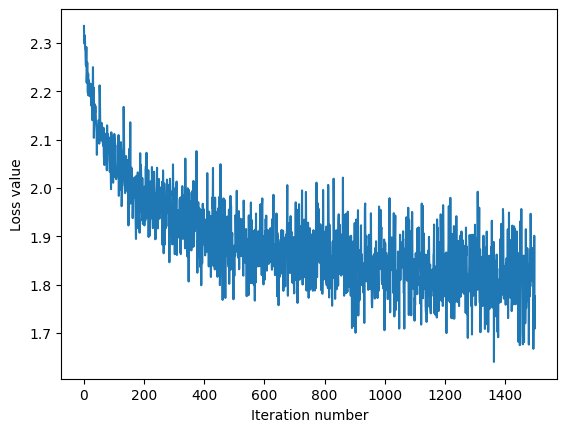

In [16]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [17]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.37881632653061226
validation accuracy: 0.39


## Optimize the softmax classifier

In [18]:
np.finfo(float).eps

2.220446049250313e-16

In [20]:
# ============================================================== #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #

learning_rates = np.linspace(2, -8, 12)
learning_rates = 10**learning_rates
print(learning_rates)

num_iters = 1500
num_rates = len(learning_rates)
loss_histories = np.zeros((num_rates, num_iters), dtype=float)
validation_accuracies = np.zeros(num_rates, dtype=float)
for i in range(num_rates):
    loss_histories[i] = softmax.train(X_train, y_train, learning_rate=learning_rates[i],
                                      num_iters=num_iters, verbose=True)
    y_pred = softmax.predict(X_val)
    accuracy = np.mean(y_pred == y_val)
    validation_accuracies[i] = accuracy

best_lr = learning_rates[np.argmax(validation_accuracies)]
best_accuracy = validation_accuracies[np.argmax(validation_accuracies)]

print("Best learning rate:", best_lr)
print("Best validation accuracy:", best_accuracy)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


[1.00000000e+02 1.23284674e+01 1.51991108e+00 1.87381742e-01
 2.31012970e-02 2.84803587e-03 3.51119173e-04 4.32876128e-05
 5.33669923e-06 6.57933225e-07 8.11130831e-08 1.00000000e-08]
iteration 0 / 1500: loss 2.376850104198011
iteration 100 / 1500: loss 21930450.818899762
iteration 200 / 1500: loss 18002661.772628788
iteration 300 / 1500: loss 30139112.424423013
iteration 400 / 1500: loss 35643494.85798577
iteration 500 / 1500: loss 22668817.58273412
iteration 600 / 1500: loss 41879530.25533271
iteration 700 / 1500: loss 23980976.744694404
iteration 800 / 1500: loss 28425963.735318568
iteration 900 / 1500: loss 41653045.50052511
iteration 1000 / 1500: loss 42389915.23338503
iteration 1100 / 1500: loss 20859953.49689545
iteration 1200 / 1500: loss 22777862.354245503
iteration 1300 / 1500: loss 21338356.136914648
iteration 1400 / 1500: loss 38965792.72549838
iteration 0 / 1500: loss 2.431368148995201
iteration 100 / 1500: loss 3911024.0104619255
iteration 200 / 1500: loss 3483064.3656539

According to the output above, the best validation accuracy is when the learning rate is around 6.579332246575682e-07 out of 12 different learning rates. The best validation accuracy that was achieved for this learning rate = 0.395